In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import calendar

# TITLE

## Attention to accepted requests for medical oxygen refill from the District Municipality of Ate



# DATA DESCRIPTION

'''Attention to accepted requests for refilling of medicinal oxygen at the “Ananías Escamilo” medicinal oxygen plant, located in the Ollantaytambo Sports Complex in the Ate district, operating from June 6, 2021 to the present, safeguarding the life and health of everyone the citizens of the Ate district and surroundings.

Initially, the District Municipality of Ate was in charge of collecting the oxygen cylinders from the homes of the applicants; this type of collection is called “collection.” Now, as the number of COVID cases has reduced, citizens approach the medicinal oxygen plant directly, this is called “reception.”'''

In [ ]:
Oxygen_refill=pd.read_csv('/content/drive/MyDrive/Omdena/Health/Atenciones_de_las_solicitud.csv',sep=';')

## DATA CLEANING

In [ ]:
print(Oxygen_refill.head(1))
print('shape:',Oxygen_refill.shape)

   FECHA_CORTE CODIGO  DOC       NRO DISTRITO PROVINCIA DEPARTAMENTO  UBIGEO  \
0     20221017   SA-1  DNI  10***018      ATE      LIMA         LIMA  150103   

       SEXO  EDAD TIPO_RECOJO  FECHA_RECOJO  CANTIDAD  
0  FEMENINO    54    Recogido      20210604         1  
shape: (1422, 13)


In [ ]:
Oxygen_refill.NRO.value_counts()

06***315    118
70***768     71
09***482     41
19***049     37
40***859     36
           ... 
06***694      1
43***007      1
45***602      1
47***273      1
21***949      1
Name: NRO, Length: 254, dtype: int64

In [ ]:
Oxygen_refill['FECHA_RECOJO'].value_counts()

20210621    26
20220222    18
20220214    18
20220418    18
20210615    16
            ..
20220905     1
20211007     1
20220808     1
20210619     1
20210911     1
Name: FECHA_RECOJO, Length: 264, dtype: int64

In [ ]:
Oxygen_refill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FECHA_CORTE   1422 non-null   int64 
 1   CODIGO        1422 non-null   object
 2   DOC           1422 non-null   object
 3   NRO           1422 non-null   object
 4   DISTRITO      1422 non-null   object
 5   PROVINCIA     1422 non-null   object
 6   DEPARTAMENTO  1422 non-null   object
 7   UBIGEO        1422 non-null   int64 
 8   SEXO          1422 non-null   object
 9   EDAD          1422 non-null   int64 
 10  TIPO_RECOJO   1422 non-null   object
 11  FECHA_RECOJO  1422 non-null   int64 
 12  CANTIDAD      1422 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 144.5+ KB


In [ ]:
Oxygen_refill.describe()

,FECHA_CORTE,UBIGEO,EDAD,FECHA_RECOJO,CANTIDAD
count,1422.0,1422.000000,1422.000000,1.422000e+03,1422.000000
mean,20221017.0,149369.007032,62.928270,2.021536e+07,1.565401
std,0.0,9444.516796,18.180514,4.768222e+03,0.821688
min,20221017.0,50201.000000,1.000000,2.021060e+07,1.000000
25%,20221017.0,150103.000000,52.000000,2.021082e+07,1.000000
50%,20221017.0,150103.000000,65.000000,2.021122e+07,1.000000
75%,20221017.0,150103.000000,74.000000,2.022031e+07,2.000000
max,20221017.0,210301.000000,109.000000,2.022102e+07,9.000000


In [ ]:
print('Null Values:', Oxygen_refill.isnull().sum().sum())

Null Values: 0


# DATA VIAUALISATION

## Demographic

### Gender distribution

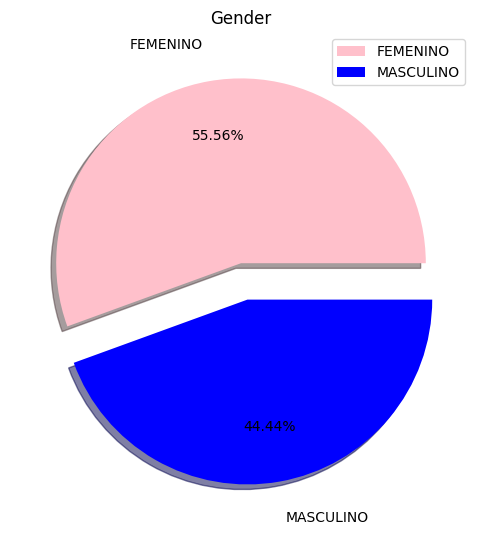

In [ ]:
Gender_count = Oxygen_refill.SEXO.value_counts()
Gender_count
plt.figure(figsize=(6,6))
plt.pie(x=Gender_count, labels=Gender_count.index,
        colors=[ 'pink', 'blue'],
        explode = [ 0, 0.2],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True)
plt.title("Gender")
plt.legend();

'''In conclusion, the gender distribution depicted in the pie plot for the oxygen refill dataset reveals a slight majority of females at 55.46%, compared to males at 44.44%. Understanding the demographic composition of the dataset is crucial for designing targeted interventions and ensuring equitable access to oxygen services. This visualization underscores the importance of considering diverse demographic factors in healthcare planning and resource allocation to address the specific needs of different populations. As we navigate the challenges of providing oxygen refills, this gender breakdown serves as a valuable insight for policymakers and healthcare professionals to tailor strategies that meet the distinct requirements of both male and female individuals in the community.'''





### Age distribution

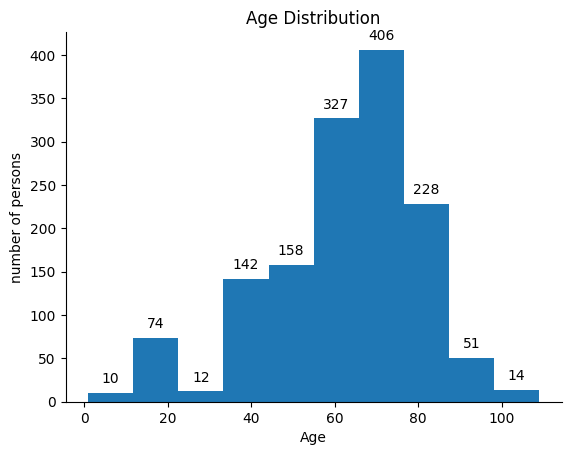

In [ ]:
from matplotlib import pyplot as plt
ax=Oxygen_refill['EDAD'].plot(kind='hist', bins=10, title='EDAD')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.xlabel("Age")
plt.ylabel("number of persons")
plt.title("Age Distribution")
#plt.xticks(rotation = 90)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

'''The histogram underscores a concentration of oxygen refill needs among individuals in their 60s, 70s, and 80s. The distribution pattern suggests a potential correlation between age and oxygen refill requirements. This information is valuable for healthcare professionals and policymakers to allocate resources effectively and tailor support services to meet the specific needs of different age groups within the community.'''

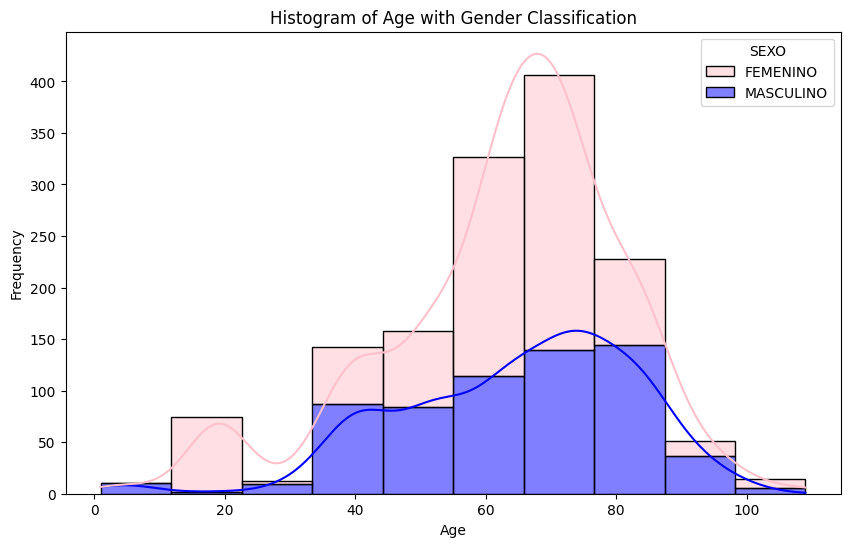

In [ ]:


# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a histogram with two separate bars for each gender
colors = {'MASCULINO': 'blue', 'FEMENINO': 'pink'}
sns.histplot(data=Oxygen_refill, x='EDAD', hue='SEXO', multiple='stack', bins=10, kde=True,palette=colors)

# Add labels and title
plt.title('Histogram of Age with Gender Classification')
plt.xlabel('Age')
plt.ylabel('Frequency')


# Show the plot
plt.show()


'''In the age range of 60 to 80 years, the histogram with KDE plot indicates a somewhat balanced distribution of oxygen refill frequencies between females and males. Females in the 60-year age group show a higher frequency, but this levels off in the 80-year age group. Meanwhile, males exhibit a moderate frequency in both age brackets. This suggests a potential convergence in oxygen refill needs between genders within this age range. Understanding these patterns is crucial for tailoring healthcare interventions to meet the nuanced requirements of individuals aged 60 to 80.'''

In [ ]:
# Group by 'EDAD' (age) and calculate the count of oxygen refills for each age group
age_oxygen_counts = Oxygen_refill.groupby('EDAD')['CANTIDAD'].count().reset_index()

# Rename the columns for clarity
age_oxygen_counts.columns = ['Age', 'CANTIDAD_Count']

# Display the resulting DataFrame
print(age_oxygen_counts)

    Age  CANTIDAD_Count
0     1               2
1     5               6
2     6               2
3    18               2
4    19              71
..  ...             ...
72   94              16
73   98               3
74   99               5
75  100               4
76  109               5

[77 rows x 2 columns]


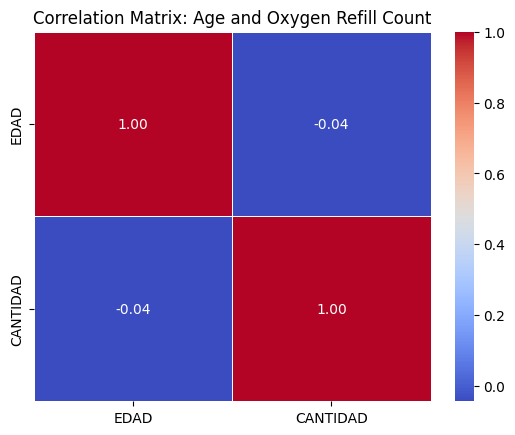

In [ ]:
# Select relevant columns
selected_columns = ['EDAD', 'CANTIDAD']
selected_data = Oxygen_refill[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Title
plt.title('Correlation Matrix: Age and Oxygen Refill Count')

# Show the plot
plt.show()

'''Correlation Coefficient of -0.04: A correlation coefficient close to 0 suggests a very weak or negligible linear relationship between the variables. In this case, it implies that there is little to no consistent linear trend between age and the count of oxygen refills.'''

### Individual contribution

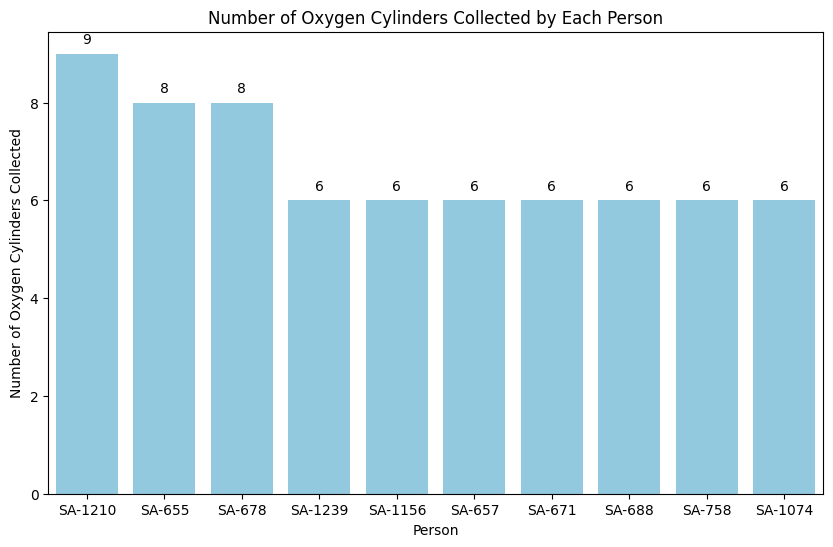

In [ ]:
df_sorted = Oxygen_refill.sort_values(by='CANTIDAD', ascending=False)

# Select the top 10 individuals
top_10 = df_sorted.head(10)
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(data=top_10, x='CODIGO', y='CANTIDAD',color = 'skyblue')

# Add labels and title
plt.title('Number of Oxygen Cylinders Collected by Each Person')
plt.xlabel('Person')
plt.ylabel('Number of Oxygen Cylinders Collected')

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show();

'''The analysis of accepted requests for medical oxygen refill within the dataset reveals a diverse distribution in the number of cylinders collected by top 10 patients. At the forefront of this distribution, one individual demonstrated an outstanding effort by securing the highest count of 9 cylinders. Furthermore, two patients each successfully obtained 8 cylinders, while a group of seven individuals achieved a collection of 6 cylinders each.

This variability in the number of collected cylinders underscores the diverse and specific needs of patients seeking medical oxygen. The presence of individuals with higher counts highlights the urgency of addressing their critical healthcare requirements. The dataset provides valuable insights for healthcare providers and policymakers to understand the varied demands and allocate resources effectively. Recognizing and responding to these disparities can contribute to a more targeted and equitable approach to managing medical oxygen refill requests. In essence, the analysis emphasizes the importance of tailoring support to individual patient needs within the broader context of medical oxygen distribution.'''

### Age related pattern

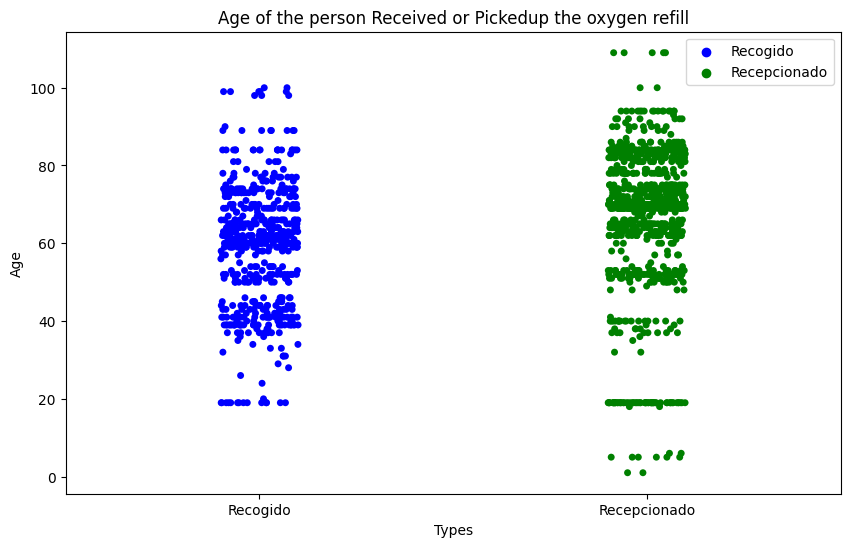

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

colors = {'Recogido': 'blue', 'Recepcionado': 'green'}
strip=sns.stripplot(y=Oxygen_refill.EDAD,x=Oxygen_refill.TIPO_RECOJO, hue=Oxygen_refill.TIPO_RECOJO,palette=colors);
strip.legend(loc='upper right')

# Add labels and title
plt.title('Age of the person Received or Pickedup the oxygen refill')
plt.xlabel('Types')
plt.ylabel('Age')



# Show the plot
plt.show();

'''The strip plot analysis reveals a distinct age-related pattern in the distribution of individuals picking up and receiving oxygen refills. The majority of people aged 60 to 85 are observed to have actively picked up the oxygen refill, suggesting a proactive engagement within this age range. Additionally, individuals aged 60 to 90 are predominantly those who have received the oxygen refill. Other age groups exhibit a scattered distribution of points, indicating a more varied participation in both picking up and receiving oxygen refills.'''

In [ ]:
# Oxygen_refill.DISTRITO.value_counts()
# Assuming you want to categorize 'day' and combine categories with count less than 5 into 'Others'
threshold = 4

# Get the counts of each category
District_count=Oxygen_refill['DISTRITO'].value_counts()

# Create a new column with categories or 'Others'
Oxygen_refill['DISTRITO_category'] = Oxygen_refill['DISTRITO'].apply(lambda x: x if District_count[x] >= threshold else 'OTHERS')



In [ ]:
Oxygen_refill.head()

,FECHA_CORTE,CODIGO,DOC,NRO,DISTRITO,PROVINCIA,DEPARTAMENTO,UBIGEO,SEXO,EDAD,TIPO_RECOJO,FECHA_RECOJO,CANTIDAD,DISTRITO_category
0,20221017,SA-1,DNI,10***018,ATE,LIMA,LIMA,150103,FEMENINO,54,Recogido,20210604,1,ATE
1,20221017,SA-2,DNI,10***284,ATE,LIMA,LIMA,150103,MASCULINO,65,Recogido,20210604,1,ATE
2,20221017,SA-3,DNI,06***949,ATE,LIMA,LIMA,150103,FEMENINO,62,Recogido,20210604,1,ATE
3,20221017,SA-4,DNI,41***441,ATE,LIMA,LIMA,150103,MASCULINO,40,Recogido,20210604,1,ATE
4,20221017,SA-5,DNI,10***064,ATE,LIMA,LIMA,150103,FEMENINO,46,Recogido,20210604,1,ATE


## Geographic Distribution

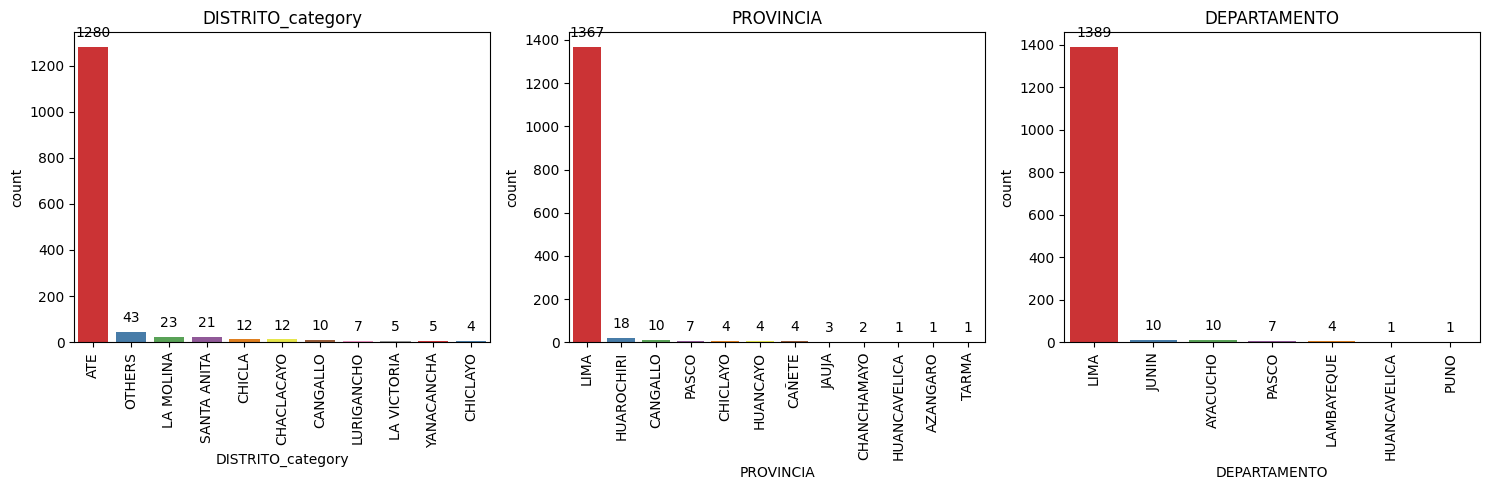

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# List of columns to create countplots for
columns_to_plot = ['DISTRITO_category', 'PROVINCIA', 'DEPARTAMENTO']

# Loop through the columns and create countplots
for i, column in enumerate(columns_to_plot):
    order = Oxygen_refill[column].value_counts().sort_values(ascending=False).index
    sns.countplot(x=column, data=Oxygen_refill, palette="Set1", order=order, ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=90)

    # Annotate each subplot
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

'''1.DISTRITO_category:
The majority of entries fall under the category 'ate' with a count of 1280.
'La Molina' and 'Santa Anita' have counts of 23 and 21, respectively, indicating a moderate presence.
All other categories have counts below 10, suggesting a relatively lower representation.'''

'''
2.PROVINCIA:
The majority of entries are associated with the province 'Lima,' comprising 1367 counts.
'Huarochiri' follows with a count of 18.
All other provinces have counts below 10, indicating a minor presence.'''

'''
3.DEPARTAMENTO:
The department 'Lima' exhibits the highest count, reaching 1389.
All other departments have counts below 10, emphasizing a notable concentration in the 'Lima' department.'''

'''
The distribution of counts across different categories within 'DISTRITO_category,' 'PROVINCIA,' and 'DEPARTAMENTO' highlights a clear concentration in specific entries. This information is crucial for understanding the dataset's regional or categorical disparities, which can inform targeted analyses, resource allocation, or interventions based on the identified concentrations. The dominance of certain categories suggests potential areas of focus, while the presence of lower counts in others implies a need for further exploration or consideration in a broader context.
'''



In [ ]:
Oxygen_refill['FECHA_RECOJO'] = pd.to_datetime(Oxygen_refill['FECHA_RECOJO'], format='%Y%m%d')
Oxygen_refill.head(1)

,FECHA_CORTE,CODIGO,DOC,NRO,DISTRITO,PROVINCIA,DEPARTAMENTO,UBIGEO,SEXO,EDAD,TIPO_RECOJO,FECHA_RECOJO,CANTIDAD,DISTRITO_category
0,20221017,SA-1,DNI,10***018,ATE,LIMA,LIMA,150103,FEMENINO,54,Recogido,2021-06-04,1,ATE


In [ ]:
Oxygen_refill['day_of_week'] = Oxygen_refill['FECHA_RECOJO'].dt.day_name()

In [ ]:
Oxygen_refill['Week_refill'] = Oxygen_refill['FECHA_RECOJO'].dt.isocalendar().week
week_number_format = '{}'
Oxygen_refill['Week_refill'] = Oxygen_refill['Week_refill'].apply(lambda x: week_number_format.format(x))

In [ ]:
Oxygen_refill.head(1)

,FECHA_CORTE,CODIGO,DOC,NRO,DISTRITO,PROVINCIA,DEPARTAMENTO,UBIGEO,SEXO,EDAD,TIPO_RECOJO,FECHA_RECOJO,CANTIDAD,DISTRITO_category,day_of_week,Week_refill
0,20221017,SA-1,DNI,10***018,ATE,LIMA,LIMA,150103,FEMENINO,54,Recogido,2021-06-04,1,ATE,Friday,22


In [ ]:
Oxygen_refill.CANTIDAD.sum()

2226

In [ ]:
Oxygen_refill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FECHA_CORTE        1422 non-null   int64         
 1   CODIGO             1422 non-null   object        
 2   DOC                1422 non-null   object        
 3   NRO                1422 non-null   object        
 4   DISTRITO           1422 non-null   object        
 5   PROVINCIA          1422 non-null   object        
 6   DEPARTAMENTO       1422 non-null   object        
 7   UBIGEO             1422 non-null   int64         
 8   SEXO               1422 non-null   object        
 9   EDAD               1422 non-null   int64         
 10  TIPO_RECOJO        1422 non-null   object        
 11  FECHA_RECOJO       1422 non-null   datetime64[ns]
 12  CANTIDAD           1422 non-null   int64         
 13  DISTRITO_category  1422 non-null   object        
 14  day_of_w

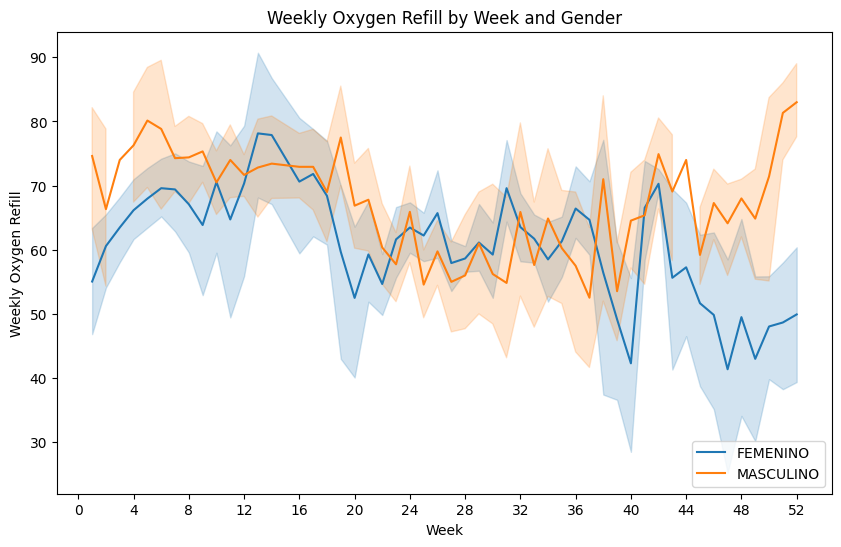

In [ ]:

# Plotting
Oxygen_refill['Week_refill'] = Oxygen_refill['Week_refill'].astype(int, errors='ignore')

# Sort the DataFrame by 'Week_refill'

#Oxygen_refill.sort_values(by='Week_refill', inplace=True)

## Create a line plot with hue based on gender
plt.figure(figsize=(10, 6))
lin=sns.lineplot(y='EDAD', x='Week_refill', hue='SEXO', data=Oxygen_refill)
lin.legend(loc='lower right')

# Set plot labels and title
plt.xlabel('Week')
plt.ylabel('Weekly Oxygen Refill')
plt.title('Weekly Oxygen Refill by Week and Gender')

# Show the plot
#plt.xticks(rotation = 90)
plt.xticks(range(0, Oxygen_refill['Week_refill'].max() + 1, 4))
plt.show()

## Monthly Trends

<ipython-input-82-da74583dac81>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = Oxygen_refill.groupby(['year', 'month']).mean().reset_index()


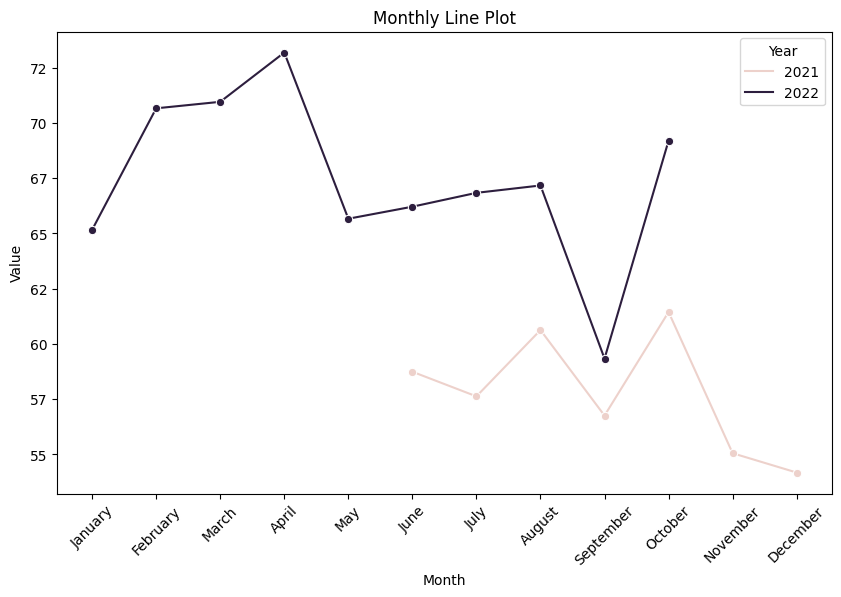

In [ ]:
Oxygen_refill['month'] = Oxygen_refill['FECHA_RECOJO'].dt.month
Oxygen_refill['year'] = Oxygen_refill['FECHA_RECOJO'].dt.year

# Group by month and year, and calculate the mean (you can change this based on your needs)
monthly_data = Oxygen_refill.groupby(['year', 'month']).mean().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
plot =sns.lineplot(x='month', y='EDAD', hue='year', data=monthly_data, marker='o')

# Customize the plot
plt.title('Monthly Line Plot')
plt.xlabel('Month')
plt.ylabel('Value')
# Format y-axis ticks as integers
plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.legend(title='Year')

'''Monthly counts exhibit variations, with certain months experiencing increases or decreases in oxygen refill demand.
The months of May, June, and July in 2023 consistently have counts above 65 and below 67, suggesting a relatively stable demand during that period.
Notable decreases in September 2022 and September 2023 may indicate a seasonal or periodic pattern in oxygen refill needs.
Understanding monthly trends is crucial for resource planning and ensuring that healthcare services are responsive to changing demands throughout the year.'''

## Days of the week

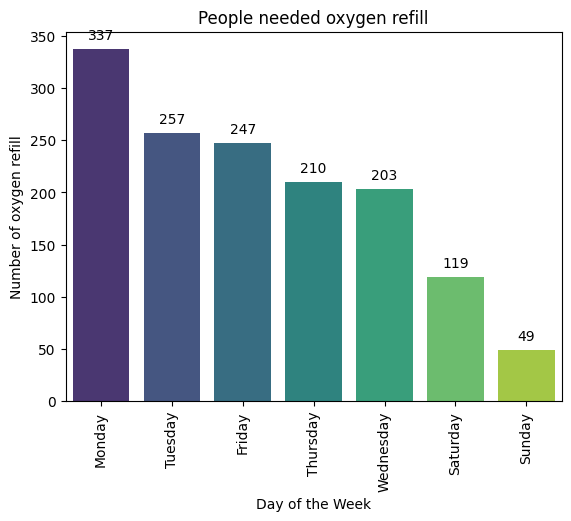

In [ ]:
# Count the number of admissions for each day of the week
Oxygen_refill_by_day = Oxygen_refill['day_of_week'].value_counts().reset_index()
Oxygen_refill_by_day.columns = ['DayOfWeek', 'Frequency']

#Create a barchart
ax = sns.barplot(x='DayOfWeek', y='Frequency', data=Oxygen_refill_by_day, order=Oxygen_refill_by_day['DayOfWeek'], palette='viridis')
# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of oxygen refill')
plt.title('People needed oxygen refill')
plt.xticks(rotation = 90)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Show the plot
plt.show()

'''Weekdays, particularly Monday, Tuesday, and Friday, exhibit higher demand for oxygen refills, possibly related to increased activities or healthcare-related services during the workweek.
The lower counts on weekends (Saturday and Sunday) suggest a potential decrease in the need for oxygen services during these days.
Understanding the weekly patterns in oxygen refill demand can be valuable for resource allocation, staffing, and planning to ensure that healthcare services are effectively meeting the varying needs of the community throughout the week.
'''

# CONCLUSION

'''
1.Demographic Distribution:

Age plays a significant role in oxygen refill needs, with a concentration observed among individuals aged 60 to 85.
The dataset reflects higher frequencies for females, particularly in age groups 70 and 80.'''

'''
2.Individual Contributions:

Notable individual efforts are evident, with the highest oxygen refill count reaching 9, and a group of two individuals contributing 8 each.
These top contributors underscore the significance of individual initiatives in oxygen collection efforts.'''
'''

3.Age-Related Patterns:
The histogram with KDE plot highlights varying oxygen refill needs across age groups, emphasizing the importance of considering age in resource allocation and support services.'''
'''

4.Geographic Distribution:
The strip plot reveals distinctions in age distribution between types 'Recogido' and 'Recepcionado,' providing insights into regional variations in oxygen refill engagement.'''
'''

5.Monthly Trends:

Monthly reports for 2023 show varying oxygen refill counts, with an increase in April and a notable decrease in September.
The months of May, June, and July consistently have counts above 65 and below 67, suggesting stability in oxygen refill demand during that period.'''
'''

6.Day of the Week Analysis:

There is a clear pattern in the number of oxygen refills throughout the week, with Monday having the highest count, followed by Tuesday and Friday.
Weekends (Saturday and Sunday) show lower demand, indicating potential variations in healthcare services needed during weekdays versus weekends.'''
'''

Overall Implications:

Tailoring support services based on age and gender demographics can enhance the effectiveness of oxygen refill initiatives.
Recognizing and appreciating individual contributions is essential for fostering community engagement.
Geographic and regional variations in oxygen refill engagement emphasize the need for targeted interventions in specific areas.
Understanding weekly and monthly trends facilitates better resource allocation and ensures responsiveness to fluctuating demands over time.
In conclusion, a comprehensive analysis of the dataset provides a nuanced understanding of the factors influencing oxygen refill needs, enabling healthcare professionals and policymakers to implement informed strategies for effective and equitable service delivery.
'''

# REFERENCE



'''
**Attention to accepted requests for medical oxygen refill from the District Municipality of Ate**'''
'''
**Dataset Name**:Attention to accepted requests for medical oxygen refill'''
'''
**Retrieved from**
https://www.datosabiertos.gob.pe/dataset/atenciones-de-solicitudes-aceptadas-de-recarga-de-ox%C3%ADgeno-medicinal-de-la-municipalidad'''